In [ ]:
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 3.0.1 which is incompatible.


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

hoh_dataset, hoh_info = tfds.load(name='horses_or_humans', with_info=True, as_supervised=True)
hoh_train, hoh_test = hoh_dataset['train'], hoh_dataset['test']

num_validation_samples = 0.1 * hoh_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

# Count the number of samples for each class
# num_horses = 0
# num_humans = 0

# for example in hoh_train:
#     label = example[1].numpy()
#     if label == 0:  # Assuming 0 represents horses, and 1 represents humans
#         num_horses += 1
#     else:
#         num_humans += 1

# print(f"Number of horse samples: {num_horses} ({num_horses:.2f}% of the dataset)")
# print(f"Number of human samples: {num_humans} ({num_humans:.2f}% of the dataset)")

num_test_samples = hoh_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

# Preprocess and normalize the images
def scale(img, label):
  img = tf.image.rgb_to_grayscale(img)
  img = tf.cast(img, tf.float32)
  img /= 255

  # Grayscale
  #img = tf.image.rgb_to_grayscale(img)

  # Random rotation
  # img = tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

  return img, label

# Apply the preprocessing function to the dataset
scaled_train_and_validation_data = hoh_train.map(scale)
test_data = hoh_test.map(scale)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompletePZ42X2/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompletePZ42X2/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


# **SHUFFLING**

In [ ]:
# Shuffle and batch the datasets
BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

# # Extract 25 imgs and labels from the dataset
# sample_images, sample_labels = [], []
# for i, (image, label) in enumerate(shuffled_train_and_validation_data.take(25)):
#     sample_images.append(image.numpy())
#     sample_labels.append(label.numpy())

# # Define class names (assuming 0 represents horses and 1 represents humans)
# class_names = ['Horse', 'Human']

# # Plot the images
# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(sample_images[i])
#     plt.xlabel(class_names[sample_labels[i]])

# plt.show()

# **CREATE THE MODEL**

In [ ]:
# Create a model (you can replace this with your own model)
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(2)
# ])

input_size = 784
output_size = 2
hidden_layer_size = 100

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(300,300,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax')
                            ])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 90000)             0         
                                                                 
 dense_9 (Dense)             (None, 100)               9000100   
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 2)                 202       
                                                                 
Total params: 9010402 (34.37 MB)
Trainable params: 9010402 (34.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **COMPILE THE MODEL**

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **TRAIN THE MODEL**

In [ ]:
# Train the model on the training dataset
history = model.fit(train_data, epochs=10, validation_data=(validation_inputs, validation_targets),
          validation_steps=10, verbose=2)

Epoch 1/10
10/10 - 5s - loss: 15.6829 - accuracy: 0.5254 - val_loss: 3.9819 - val_accuracy: 0.5490 - 5s/epoch - 497ms/step
Epoch 2/10
10/10 - 5s - loss: 2.4930 - accuracy: 0.5924 - val_loss: 3.5619 - val_accuracy: 0.5490 - 5s/epoch - 544ms/step
Epoch 3/10
10/10 - 5s - loss: 2.2092 - accuracy: 0.6022 - val_loss: 2.3621 - val_accuracy: 0.6176 - 5s/epoch - 548ms/step
Epoch 4/10
10/10 - 4s - loss: 1.3365 - accuracy: 0.6638 - val_loss: 0.8340 - val_accuracy: 0.7549 - 4s/epoch - 402ms/step
Epoch 5/10
10/10 - 4s - loss: 0.8698 - accuracy: 0.7405 - val_loss: 0.6355 - val_accuracy: 0.7843 - 4s/epoch - 395ms/step
Epoch 6/10
10/10 - 6s - loss: 0.7672 - accuracy: 0.7557 - val_loss: 0.5312 - val_accuracy: 0.7745 - 6s/epoch - 557ms/step
Epoch 7/10
10/10 - 4s - loss: 0.7690 - accuracy: 0.7438 - val_loss: 0.4472 - val_accuracy: 0.8137 - 4s/epoch - 432ms/step
Epoch 8/10
10/10 - 4s - loss: 0.3858 - accuracy: 0.8422 - val_loss: 0.3619 - val_accuracy: 0.8529 - 4s/epoch - 418ms/step
Epoch 9/10
10/10 - 6s -

# **TEST THE MODEL**

1/1 [==============================] - 0s 489ms/step - loss: 0.5677 - accuracy: 0.7656
Test loss: 0.57. Test accuracy: 76.56%


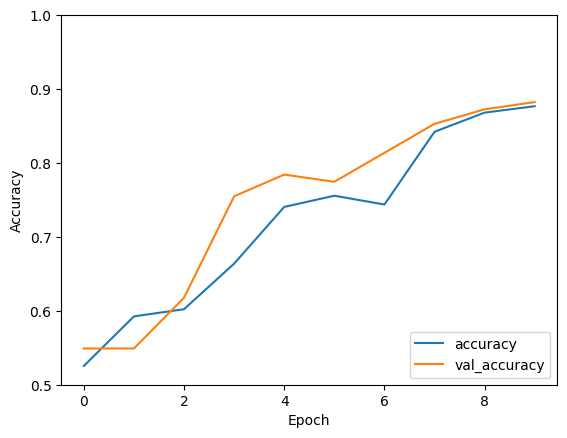

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data)

print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))